<a href="https://colab.research.google.com/github/NayelySaldivar/ClasificadorCancerEsofago/blob/master/Notebooks/PerceptronClasificadorDigitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cargar librerías y módulos requerdidos

In [1]:
import os            # módulo para manejar carpetas y archivos en nuestro ordenador
import random        # módulo para aleatorizar

import numpy as np   # biblioteca para manejar matrices y operaciones de matrices 
import pandas as pd  # biblioteca para manejar tablas de datos

#Skimage (Scikit-image): biblioteca para procesamiento de imágenes
from skimage import io  #Modulo para leer una imagen (librería para procesamiento de imagenes)

#Sklearn (Scikit-learn): biblioteca para machine learning 
from sklearn.model_selection import train_test_split   
from sklearn.linear_model import Perceptron 
from sklearn.metrics import accuracy_score

#Bibliotecas para gráficar y visualizar
import matplotlib.pyplot as plt        
import seaborn as sns   

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Lectura de datos. 

### Lectura de imágenes (X)

**Lo primero que tenemos que hacer es descomprimir el archivo zip que guardamos en nuestro dirve**

In [8]:
!unzip "/content/drive/MyDrive/digitos_7.zip" -d "/Dataset_digitos/"
# Para descomprimir el zip :o
# pregutar qué rollo con esto

Archive:  /content/drive/MyDrive/digitos_7.zip
replace /Dataset_digitos/content/drive/MyDrive/Datos/digitos_7.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /Dataset_digitos/content/drive/MyDrive/Datos/digitos_7.csv  


In [81]:
data = pd.read_csv('/content/Dataset_Digitos/content/drive/MyDrive/Datos/digitos_7.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,clase7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [21]:
# ¿Con cuántas imágenes vamos a trabajar?
data.shape[0]

70000

In [22]:
# ¿Cuántas hay de cada clase?
data.clase7.value_counts()

False    62707
True      7293
Name: clase7, dtype: int64

In [15]:
# Definimos nuestras variables:
X = data.drop(columns = 'clase7')
y = data[['clase7']]

In [49]:
# Para visualizar tenemos que reeestructuras las imágenes:
X_images = np.array(X).reshape(X.shape[0], 28, 28)
# X_images[0][0]
io.imshow(X_images[0]);

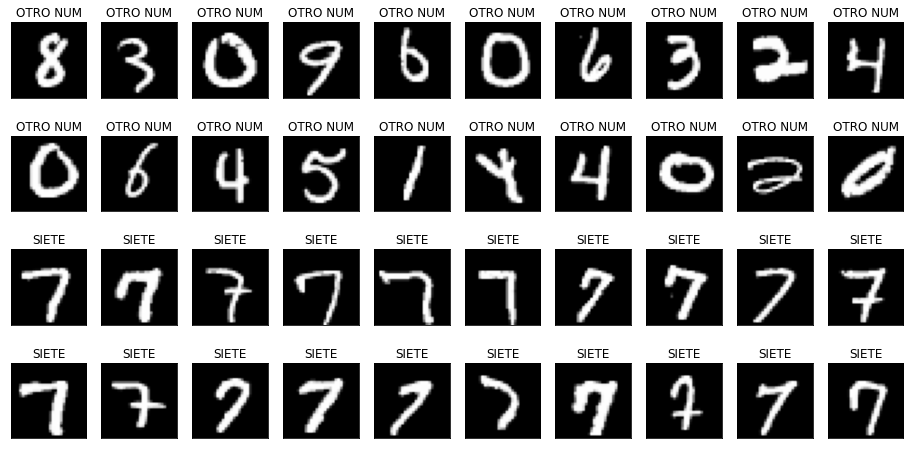

In [63]:
#El método GroupBy de Pandas separa un data frame en varios data frames
porClase = data.groupby('clase7')

#elije al azar n muestras de cada subconjunto y guarda la posición de las figuras elegidas en una lista
n = 20
c = random.sample(porClase.get_group(False).index.tolist(), n) # indices de las imagenes QUE TIENEN 7 ESCRITO
s = random.sample(porClase.get_group(True).index.tolist(), n) # indices de las imagenes CON 7

# Grafica 20 imágenes aleatorias de tejido con cáncer y 20 de tejido sano
fig = plt.figure(figsize=(16, 8))
columns = 10
rows = 4
for i in range(0, columns * rows):
    fig.add_subplot(rows, columns, i+1)
    if i < 20:
        plt.imshow(X_images[c[i]], cmap='Greys_r')
        plt.title('OTRO NUM')
        plt.xticks([])
        plt.yticks([])
    else:
        plt.imshow(X_images[s[i-20]], cmap='Greys_r')
        plt.title('SIETE')
        plt.xticks([])
        plt.yticks([])
plt.show()

In [51]:
X_images.shape

(70000, 28, 28)

Ya no hay que aplanar la matriz porque de inicio teníamos un vector por imagen. 

In [65]:
X.head(3)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Entrenamiento utilizando perceptrón simple con conjunto de entrenamiento y prueba

### Crear subconjuntos de entrenamiento y prueba



In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, random_state=0)

In [71]:
# ¿Cómo son los conjuntos de entrenamiento y prueba?
print("Training set")
print("X: ", X_train.shape)
print("Y: ", y_train.shape)
unique, counts = np.unique(y_train, return_counts=True)
print('Otro número:', counts[0],'\n Siete:', counts[1],'\n')


print("Test set")
print("X: ", X_test.shape)
print("Y: ", y_test.shape)
unique, counts = np.unique(y_test, return_counts=True)
print('Otro número:', counts[0],'\nSiete:', counts[1],'\n')

Training set
X:  (49000, 784)
Y:  (49000, 1)
Otro número: 43896 
 Siete: 5104 

Test set
X:  (21000, 784)
Y:  (21000, 1)
Otro número: 18811 
Siete: 2189 



### Entrenamiento



In [72]:
model = Perceptron(max_iter = 46, random_state = 0, verbose = False) 
model.fit(X_train,y_train)                                  
print("Iterations: ", model.n_iter_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iterations:  14


In [73]:
#Guardamos los coeficientes del modelo como beta
beta = model.coef_
print(beta.shape)

(1, 784)


In [75]:
# Intercepto:
model.intercept_

array([-199.])

In [76]:
y_predict = model.predict(X_test)  # pasa cada una de las imágenes de X_test por el modelo 

In [77]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_predict)*100))

Accuracy: 97.69%


In [78]:
print("Precisión conjunto entrenamiento: %.2f%%" % (model.score(X_train, y_train)*100.0))
print("Precisión conjunto prueba: %.2f%%" % (model.score(X_test, y_test)*100.0))

Precisión conjunto entrenamiento: 98.09%
Precisión conjunto prueba: 97.69%


In [88]:
comparacion = {'Y_Real': y_test.clase7,'Y_Prediccion':y_predict.T}
        
df = pd.DataFrame(comparacion, columns=['Y_Real','Y_Prediccion'])
df

,Y_Real,Y_Prediccion
10840,False,False
56267,False,False
14849,False,False
62726,False,False
47180,True,True
...,...,...
30500,False,False
27609,False,False
6155,False,False
64241,False,False


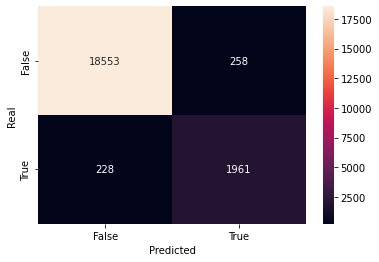

In [90]:
confusion_matrix = pd.crosstab(df['Y_Real'], df['Y_Prediccion'], rownames=['Real'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

## Entrenamiento de perceptron utilizando margen

In [91]:
model2 = Perceptron(max_iter=1000,  random_state=0, verbose=False, 
                    penalty='l2',  alpha=0.0001) 
model2.fit(X_train,y_train)                                  

print("Precisión conjunto entrenamiento: %.2f%%" % (model2.score(X_train, y_train)*100.0))
print("Precisión conjunto prueba: %.2f%%" % (model2.score(X_test, y_test)*100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión conjunto entrenamiento: 97.84%
Precisión conjunto prueba: 97.66%


In [92]:
model3 = Perceptron(max_iter=1000,  random_state=0, verbose=False, 
                    penalty='l2', alpha=0.000005) 

model3.fit(X_train,y_train)  

print("Precisión conjunto entrenamiento: %.2f%%" % (model3.score(X_train, y_train)*100.0))
print("Precisión conjunto prueba: %.2f%%" % (model3.score(X_test, y_test)*100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión conjunto entrenamiento: 97.83%
Precisión conjunto prueba: 97.48%


In [93]:
model4 = Perceptron(max_iter=1000,  random_state=0, verbose=False, 
                    penalty='l2', alpha=0.000001) 
model4.fit(X_train,y_train) 

print("Precisión conjunto entrenamiento: %.2f%%" % (model4.score(X_train, y_train)*100.0))
print("Precisión conjunto prueba: %.2f%%" % (model4.score(X_test, y_test)*100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión conjunto entrenamiento: 98.03%
Precisión conjunto prueba: 97.72%


## Evaluación adicional

Precision Score

In [94]:
from sklearn.metrics import precision_score, recall_score

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The best value is 1 and the worst value is 0.

In [95]:
precision_score(y_test, model.predict(X_test))

0.8837314105452907

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

In [96]:
recall_score(y_test, model.predict(X_test))

0.89584285061672